# Importação da bibliotecas

In [1]:
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt
from sklearn.utils.extmath import randomized_svd
import utils_imagem as utl

# Definição de constantes

In [2]:
m = 180 # altura da imagem
n = 130 # largura da imagem
DIMENSAO_IMAGEM = (m, n)

# Altera o valor da constante no módulo de processamento de imagens
utl.DIMENSAO_IMAGEM = DIMENSAO_IMAGEM

# Gerar matrizes A e M, e a face média 

In [3]:
# Matriz A(mn x q) na qual as colunas são as 'q' imagens do banco de imagens
(q, A) = utl.varrer_banco_imagens('src/FEI_face_db/*')

# Vetor f(mn x 1) com a média das colunas A, no caso, a face média
face_media = np.mean(A, axis=1, keepdims=True)

# Matriz M(mn x q) de média corrigida
M = A - face_media 

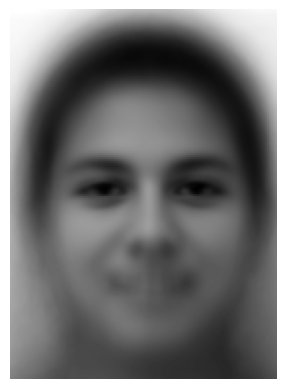

In [4]:
utl.plotar_imagem(face_media)